In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from modules import coin_simulation, plot_bins 
from modules import hoeffdingsbound, markovsbound, cum_binomial, alt_cum_binomial
from modules import AllArive, EmpiricalObs
from modules import LoadIrisData, LogisticRegression, LogisticPrediction, LogReg, LogClass

np.random.seed(2017)
%matplotlib inline

# Exercise 1

In [2]:
sim = coin_simulation() # simulates 1000000 simulations of 20 coin flips

In [3]:
df = pd.DataFrame(data=sim)

In [4]:
# Creating a dataframe with summary statistics
df['empirical_mean'] = df.mean(axis=1) #calculates the empircal mean of all experiments
sum_stats = df[[0,'empirical_mean']].groupby('empirical_mean').count().reset_index().rename(columns = {0 : 'freq'})
sum_stats['normed_freq'] = sum_stats['freq'] / np.sum(sum_stats['freq'])

In [5]:
sum_stats['cum_freq'] = sum_stats['normed_freq'].cumsum() # getting cumulated densities

In [24]:
# Creating Hoefdings Bound and Markovs Bound
sum_stats['hoeffding'] = sum_stats.apply(lambda row: hoeffdingsbound(row['empirical_mean']), axis=1)
sum_stats['markov'] = sum_stats.apply(lambda row: markovsbound(row['empirical_mean']), axis=1)
sum_stats['cum_binomial'] = sum_stats.apply(lambda row: cum_binomial(row['empirical_mean']), axis=1)


In [25]:
sum_stats

,empirical_mean,freq,normed_freq,cum_freq,hoeffding,markov,cum_binomial
0,0.00,2,0.000002,0.000002,0.000045,NaN,9.536743e-07
1,0.05,17,0.000017,0.000019,0.000304,10.000000,2.002716e-05
2,0.10,194,0.000194,0.000213,0.001662,5.000000,2.012253e-04
3,0.15,1087,0.001087,0.001300,0.007447,3.333333,1.288414e-03
4,0.20,4725,0.004725,0.006025,0.027324,2.500000,5.908966e-03
5,0.25,14661,0.014661,0.020686,0.082085,2.000000,2.069473e-02
6,0.30,36967,0.036967,0.057653,0.201897,1.666667,5.765915e-02
7,0.35,73971,0.073971,0.131624,0.406570,1.428571,1.315880e-01
8,0.40,120463,0.120463,0.252087,0.670320,1.250000,2.517223e-01
9,0.45,160356,0.160356,0.412443,0.904837,1.111111,4.119015e-01


In [27]:
# for plotting data
sum_stats_plot = sum_stats.loc[sum_stats['empirical_mean']>0.49]
sum_stats_plot

,empirical_mean,freq,normed_freq,cum_freq,hoeffding,markov,cum_binomial
10,0.50,175926,0.175926,0.588369,1.000000,1.000000,0.588099
11,0.55,159809,0.159809,0.748178,0.904837,0.909091,0.748278
12,0.60,120222,0.120222,0.868400,0.670320,0.833333,0.868412
13,0.65,73941,0.073941,0.942341,0.406570,0.769231,0.942341
14,0.70,36995,0.036995,0.979336,0.201897,0.714286,0.979305
15,0.75,14754,0.014754,0.994090,0.082085,0.666667,0.994091
16,0.80,4631,0.004631,0.998721,0.027324,0.625000,0.998712
17,0.85,1067,0.001067,0.999788,0.007447,0.588235,0.999799
18,0.90,197,0.000197,0.999985,0.001662,0.555556,0.999980
19,0.95,14,0.000014,0.999999,0.000304,0.526316,0.999999


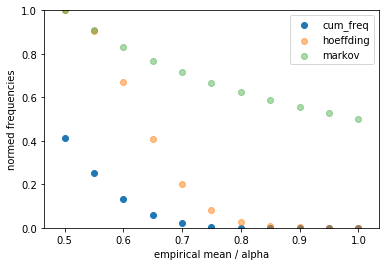

In [28]:
f, (ax1) = plt.subplots(1, 1)

ax1.scatter(sum_stats_plot['empirical_mean'], 1 - sum_stats_plot['cum_freq'])
#ax1.scatter(sum_stats_plot['empirical_mean'], sum_stats_plot['normed_freq'], alpha=0.4)
ax1.scatter(sum_stats_plot['empirical_mean'], sum_stats_plot['hoeffding'], alpha=0.5)
ax1.scatter(sum_stats_plot['empirical_mean'], sum_stats_plot['markov'], alpha=0.4)

ax1.set_ylim(0,1)
ax1.set_xlabel('empirical mean / alpha')
ax1.set_ylabel('normed frequencies')
ax1.legend()

plt.savefig("figs/ex1.png")

In [9]:
print(1 - cum_binomial(0.95)) # the probability that the empirical average >= 0.95
print(1 - cum_binomial(0.90)) # the probability that empirical average is = 1

9.53674316406e-07
2.00271606445e-05


In [10]:
print(hoeffdingsbound(1))
print(hoeffdingsbound(0.95))

4.53999297625e-05
0.000303539138079


In [11]:
print(markovsbound(1))
print(markovsbound(0.95))

0.5
0.5263157894736842


# Exercise 3

In [12]:
p = np.linspace(0, 1, num=200)

AA = AllArive(p) 
EO = EmpiricalObs(p)

AAEO = AA*EO

In [13]:
bound = max(AAEO)
worst_p = p[np.argsort(AAEO)[-1]]
print(worst_p)
print(bound)

0.954773869347
0.00619587316443


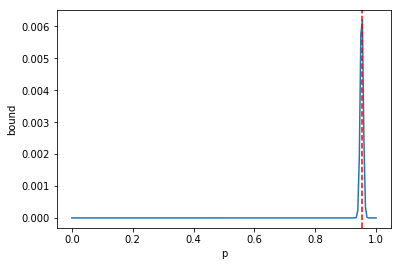

In [14]:
f, (ax1) = plt.subplots(1,1)

ax1.plot(p, AAEO)
ax1.axvline(worst_p, color='red', ls='--')
ax1.set_xlabel('p')
ax1.set_ylabel('bound')

plt.savefig('figs/ex3.png')

# Exercise 4

In [15]:
df_train, df_test = LoadIrisData()


/Users/Jeppe/MLKU/assignment2/modules.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_train['class'][ df_train['class'] == 0] = -1
/Users/Jeppe/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/Jeppe/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Jeppe/MLKU/assignment2/modules.py:96: 

In [22]:
df_pred_x =  df_train.drop('class',axis= 1)

X_train = np.array(df_train.drop('class', axis=1))
y_train = np.array(df_train['class'])

#w, w_list = LogisticRegression(X=X_train, y=y_train, eta=1, t=100)
w = LogReg(X_train, y_train)

df_test['y_hat'] = df_pred_x.apply(lambda X: LogisticPrediction(X, w), axis=1)
df_test['predict'] = df_test['y_hat'].apply(lambda x: LogClass(x))


df_test['error'] = abs(df_test['predict'] - df_test['class'])

np.mean(df_test['error'])/2

0.6153846153846154

In [23]:
print(w)

[  8.48141452 -50.84570345 -29.04677817]


In [19]:
df_test

,length,width,class,intercept,y_hat,predict,error
0,5.4,0.34,-1,1,NaN,-1,0
3,6.8,0.28,1,1,NaN,-1,2
5,5.7,0.29,1,1,NaN,-1,2
8,5.7,0.38,-1,1,NaN,-1,0
9,6.1,0.28,1,1,0.995495,1,0
10,5.8,0.40,-1,1,0.999787,1,2
11,4.6,0.32,-1,1,NaN,-1,0
13,6.0,0.34,1,1,NaN,-1,2
14,5.0,0.35,-1,1,0.000927,1,2
16,4.8,0.30,-1,1,0.000239,1,2
